In [12]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [13]:
# load the datasets into dataframe 
import pandas as pd
df = pd.read_csv("loan_dataset/Loan_Default.csv")  
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


# DATA EXPLORATION 

The dataset contains a combination of categorical and numerical features, such as ID, year, loan_limit, gender, loan_type, loan_purpose, and Credit_Worthiness, among others. It also includes a binary target variable indicating whether a loan application resulted in a default. The statistical analysis provides a brief overview of the data, helping us identify the most suitable models and techniques for our research.




In [14]:
#Preview the dataseat (Displaying the top 15 rows of the data set)

df.head(15)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [15]:
#(Displaying the top 15 rows of the data set)
df.tail(15)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
148655,173545,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CRIF,530,EXP,55-64,to_inst,75.173611,North,direct,0,30.0
148656,173546,2019,cf,Sex Not Available,nopre,type2,p3,l1,nopc,b/c,...,EXP,665,CIB,45-54,to_inst,84.514925,south,direct,0,51.0
148657,173547,2019,cf,Joint,nopre,type1,p4,l2,nopc,nob/c,...,EXP,688,EXP,65-74,not_inst,71.288210,North,direct,0,30.0
148658,173548,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,669,EXP,25-34,to_inst,NaN,south,direct,1,NaN
148659,173549,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,EXP,520,EXP,65-74,to_inst,68.503289,south,direct,0,40.0
148660,173550,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,851,EXP,45-54,not_inst,55.699088,North,direct,0,20.0
148661,173551,2019,cf,Sex Not Available,nopre,type2,p4,l1,nopc,b/c,...,EXP,585,CIB,25-34,to_inst,96.787710,south,direct,1,NaN
148662,173552,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,...,CIB,873,EXP,45-54,not_inst,78.079710,North,direct,0,31.0
148663,173553,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,619,EXP,<25,to_inst,NaN,North,direct,1,NaN
148664,173554,2019,cf,Joint,nopre,type2,p1,l1,nopc,b/c,...,EXP,859,EXP,65-74,to_inst,99.050633,central,direct,0,45.0


In [16]:
#This is Checking the size of the dataset
df.size

5054780

In [17]:
#This is checking the shape of the dataset
df.shape

(148670, 34)

In [18]:
#This is used when you want to check if a DataFrame is empty before performing operations on it.
df.empty

False

In [19]:
#This is used to display a concise summary of the DataFrame.
#It provides key details about the DataFrame's structure, such as the number of rows, the number of non-null values 
#in each column, and the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [20]:
# This is used to generate a quick statistical summary of the numerical columns in a DataFrame.
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


# DATA PREPROCESSING (PREPARATION)
This is a crucial step in the machine learning pipeline that involves preparing raw data for analysis and modeling.

In [21]:
#This shows the list of the columns in the dataset
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [22]:
# This is use to check for duplicate rows in a DataFrame, and sum() is used to count how many of those duplicate rows exist.
df.duplicated().sum()

0

In [23]:
#This Checks for missing values on each column
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [24]:
#This shows Columns with missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [25]:
#This calculates the percentage of missing values in each column of a pandas DataFrame, and then formats the result as a percentage.
missing_perc = (df.isnull().mean() * 100).round(2)
print(missing_perc.apply(lambda x: f"{x}%"))

ID                             0.0%
year                           0.0%
loan_limit                    2.25%
Gender                         0.0%
approv_in_adv                 0.61%
loan_type                      0.0%
loan_purpose                  0.09%
Credit_Worthiness              0.0%
open_credit                    0.0%
business_or_commercial         0.0%
loan_amount                    0.0%
rate_of_interest             24.51%
Interest_rate_spread         24.64%
Upfront_charges              26.66%
term                          0.03%
Neg_ammortization             0.08%
interest_only                  0.0%
lump_sum_payment               0.0%
property_value               10.16%
construction_type              0.0%
occupancy_type                 0.0%
Secured_by                     0.0%
total_units                    0.0%
income                        6.15%
credit_type                    0.0%
Credit_Score                   0.0%
co-applicant_credit_type       0.0%
age                         

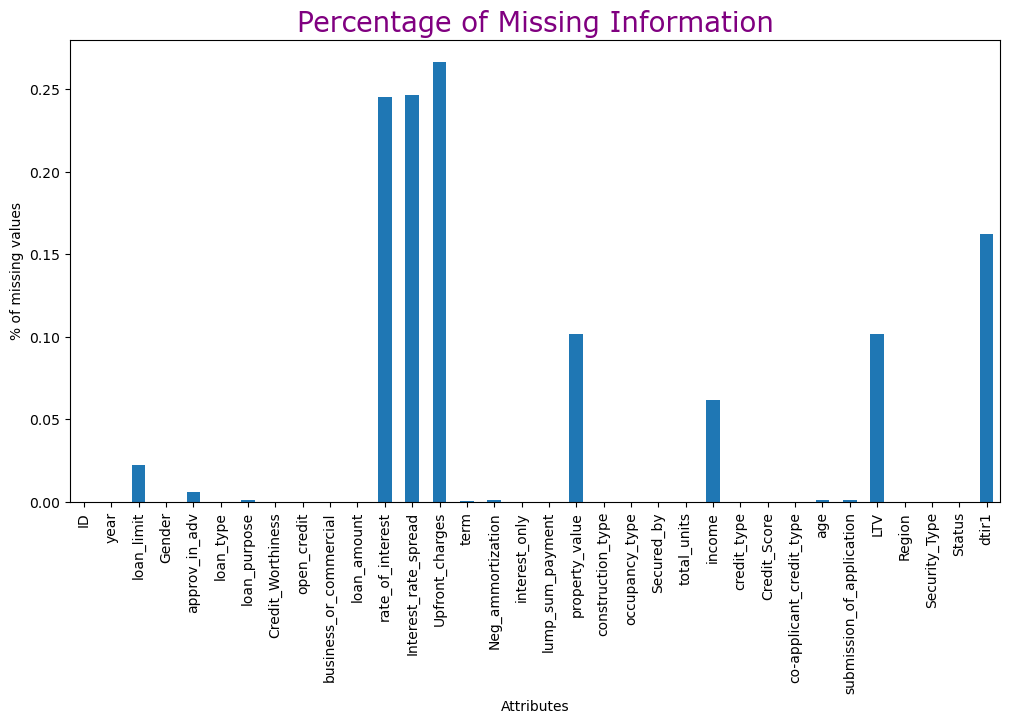

In [26]:
#plotting missing values in percentages
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('% of missing values')
plt.xlabel('Attributes')
plt.title('Percentage of Missing Information', color='Purple',font='Verdana', fontsize=20);

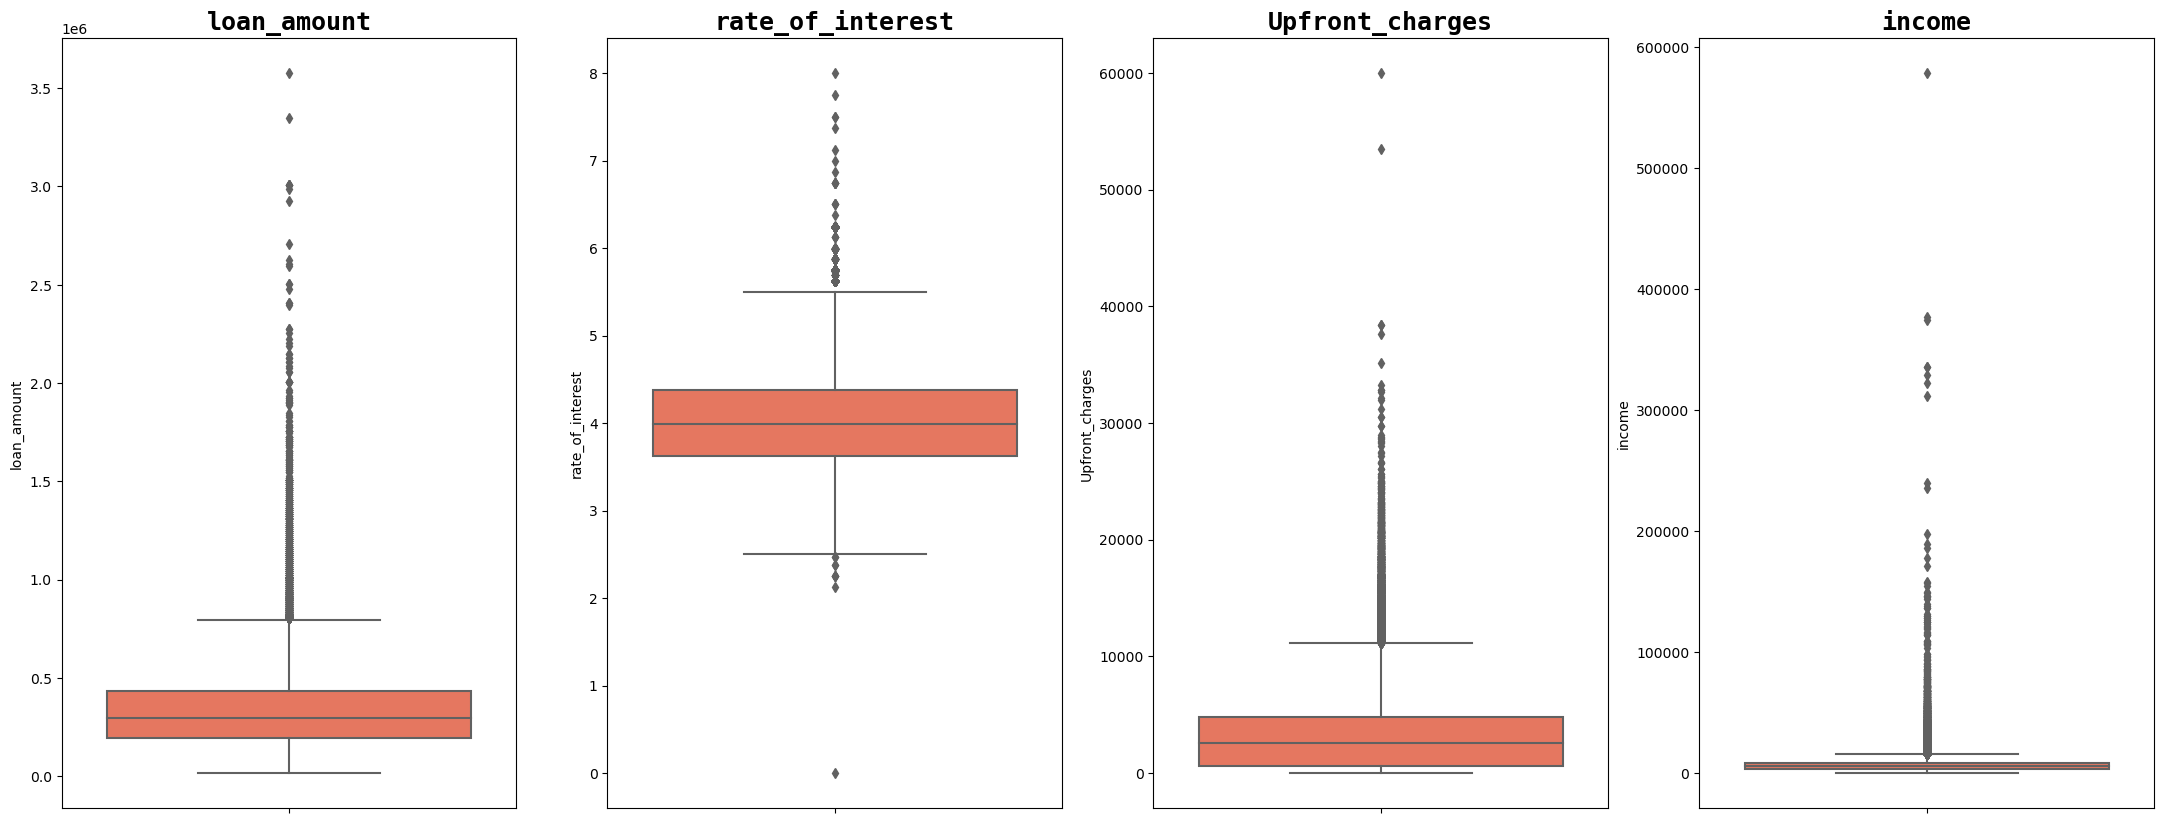

In [27]:
#Checking for outliers in the numerical columns 
import seaborn as sns
num_cols=['loan_amount', 'rate_of_interest', 'Upfront_charges', 'income']

fig, ax = plt.subplots(1, 4, figsize = (27, 10))
for i, col in enumerate(num_cols):
    g = sns.boxplot(data = df, y = col, ax = ax[i], palette = "Reds")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

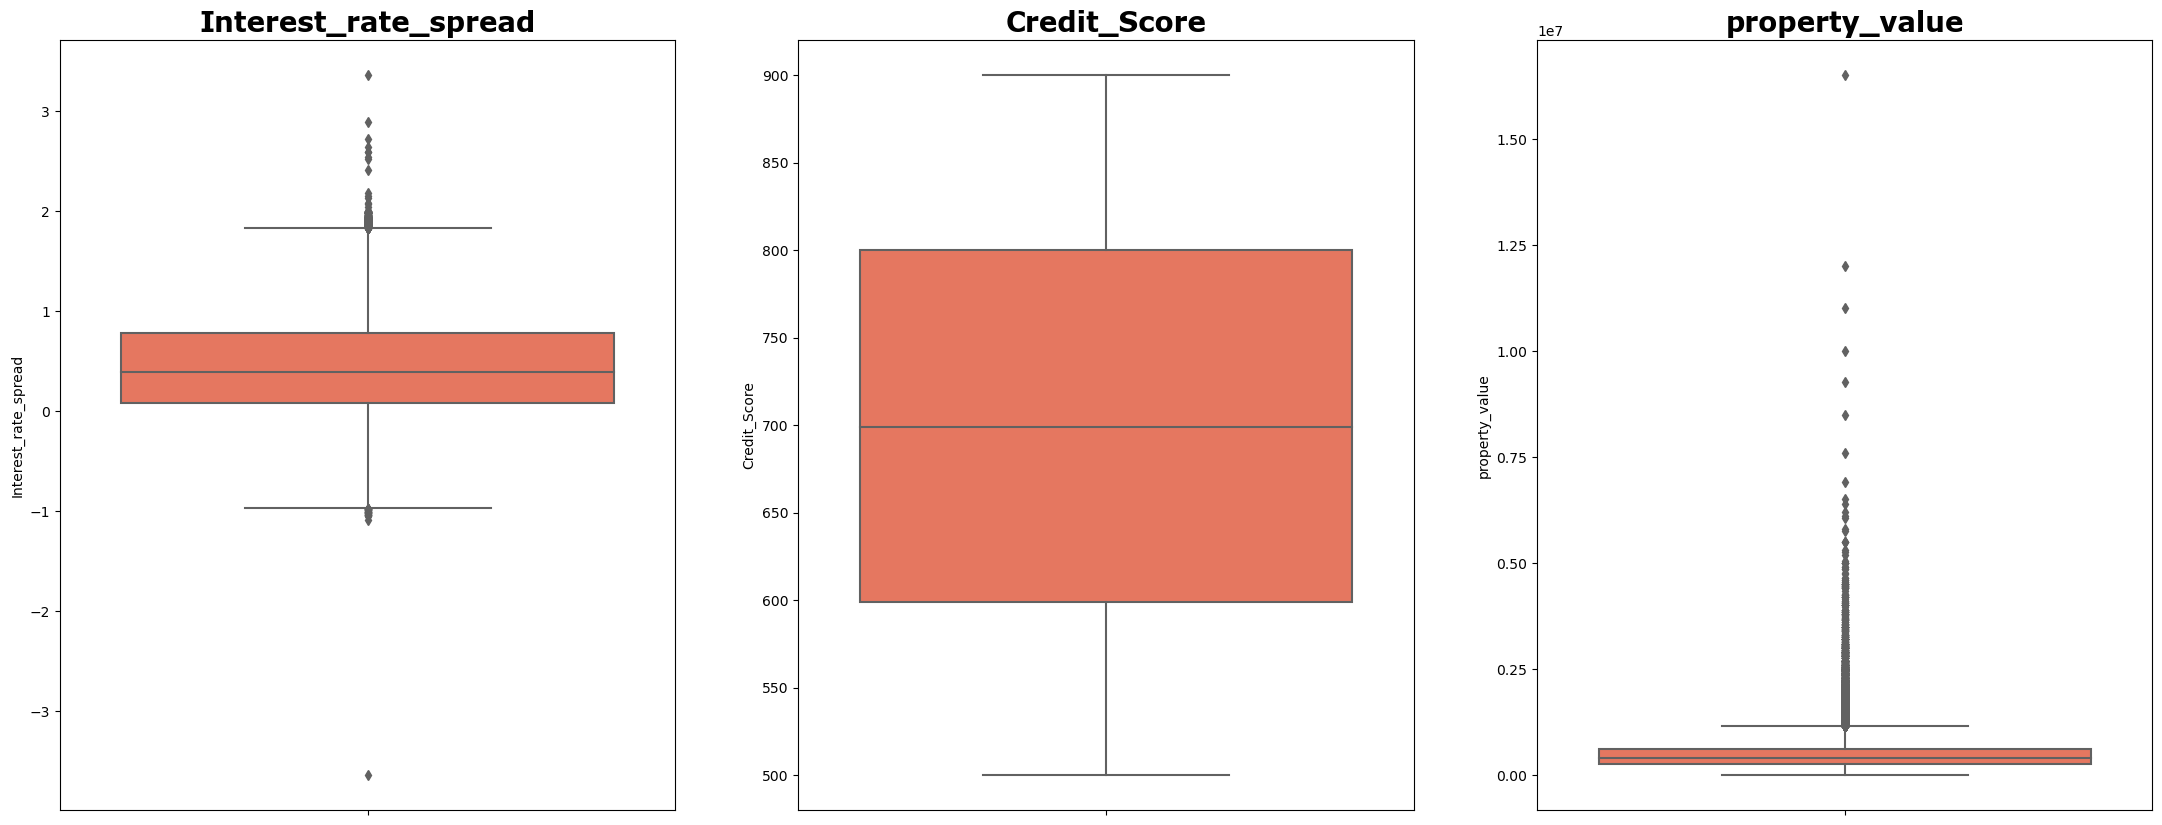

In [28]:
#Checking for outliers in the numerical columns
num_cols=['Interest_rate_spread', 'Credit_Score', 'property_value']

fig, ax = plt.subplots(1, 3, figsize = (27, 10))
for i, col in enumerate(num_cols):
    g = sns.boxplot(data = df, y = col, ax = ax[i], palette = "Reds")
    g.set_title(col, weight = "bold", fontsize = 20, fontname = "Verdana")

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


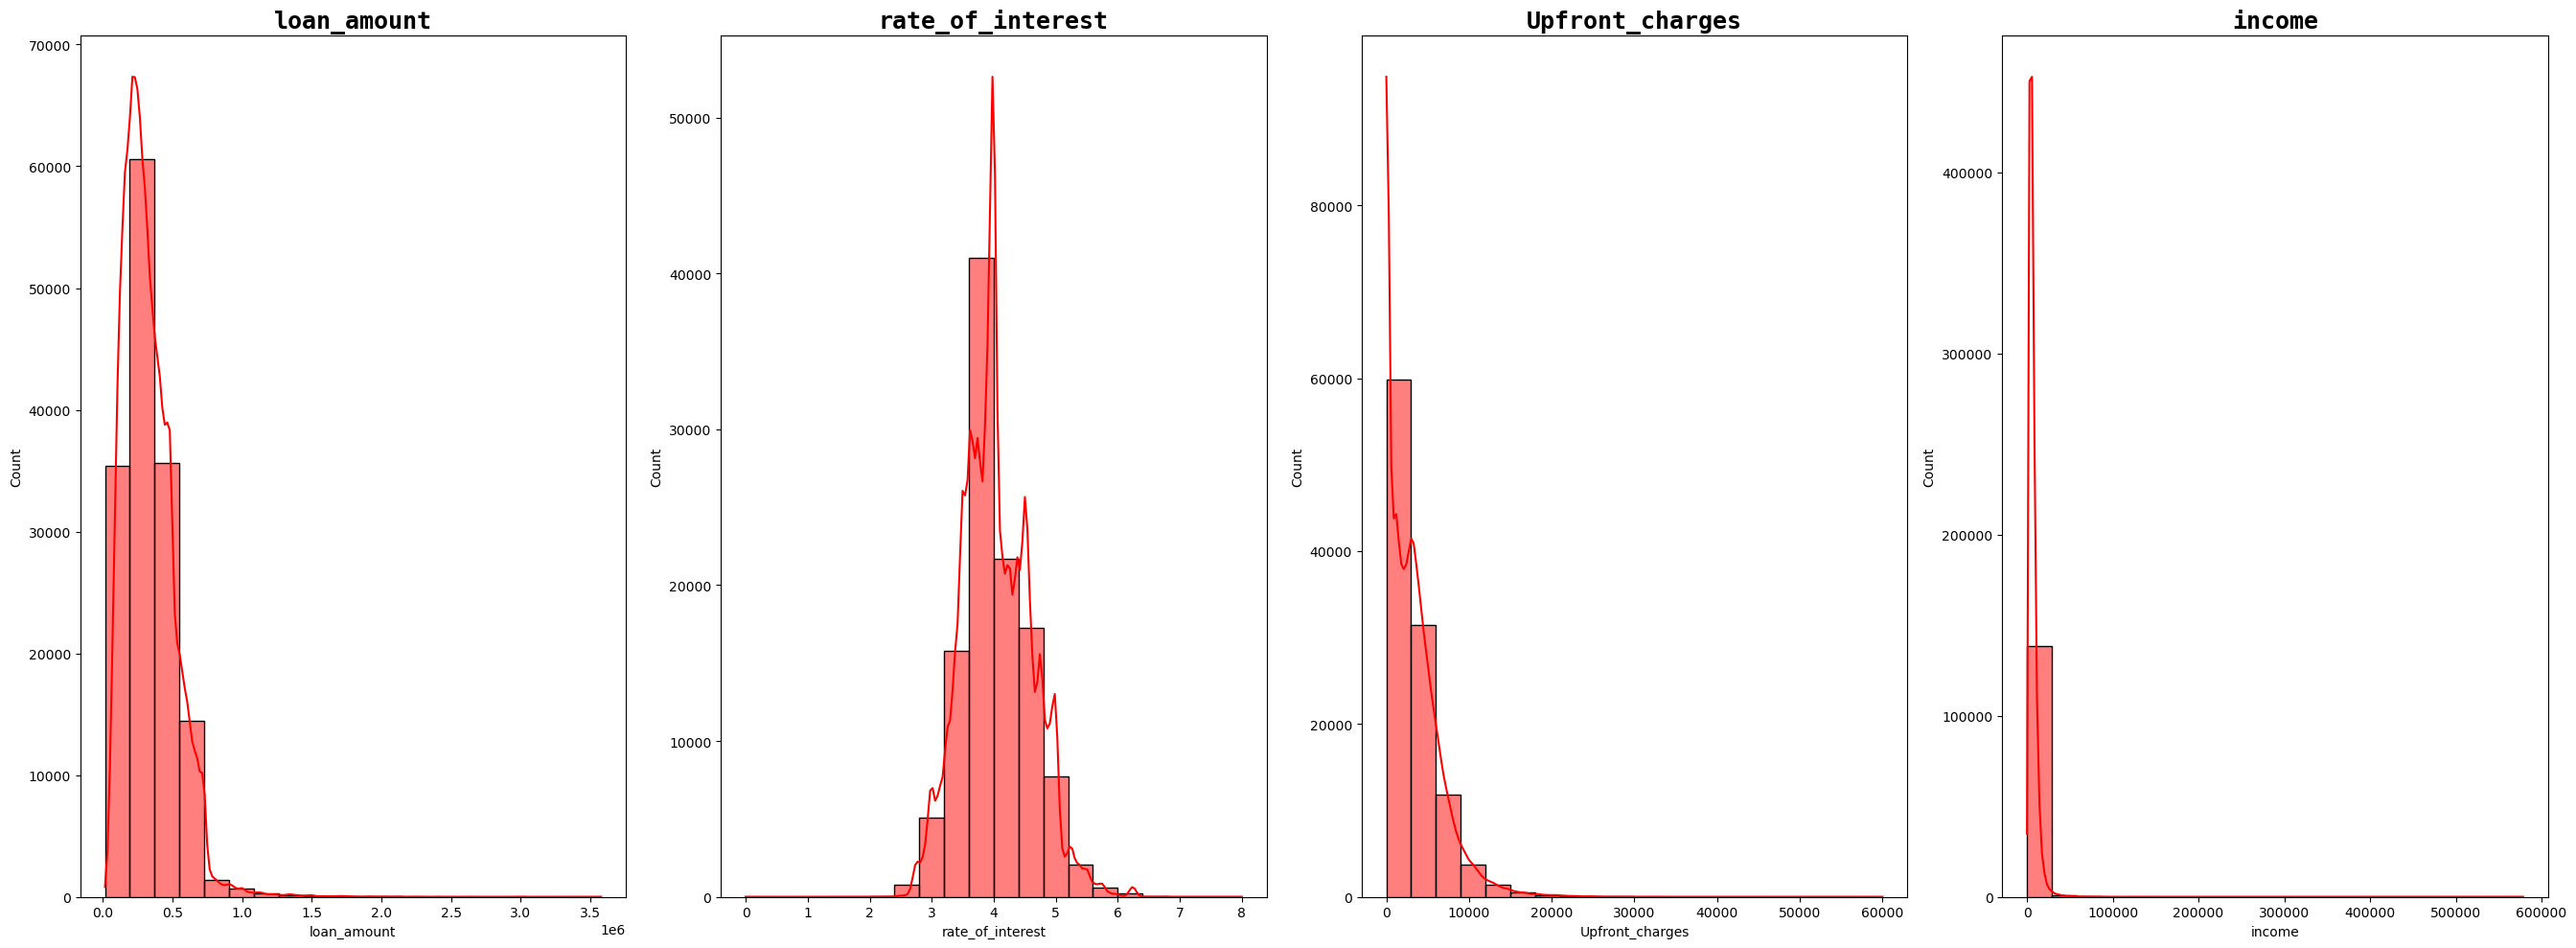

In [29]:
#Using a Histograms to visualize the distribution of the numerical columns.
num_cols = ['loan_amount', 'rate_of_interest', 'Upfront_charges', 'income']

# Verify that the column names exist
print(df.columns)

# Create subplots (1 row, 4 columns)
fig, ax = plt.subplots(1, 4, figsize=(27, 10))

# Loop through each numerical column and plot a histogram
for i, col in enumerate(num_cols):
    # Check if column exists in the DataFrame
    if col in df.columns:
        sns.histplot(data=df, x=col, ax=ax[i], kde=True, color='red', bins=20)
        ax[i].set_title(col, weight="bold", fontsize=18, fontname="monospace")
    else:
        print(f"Column '{col}' not found in the DataFrame")

# Display the plot
plt.tight_layout()
plt.show()


Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')


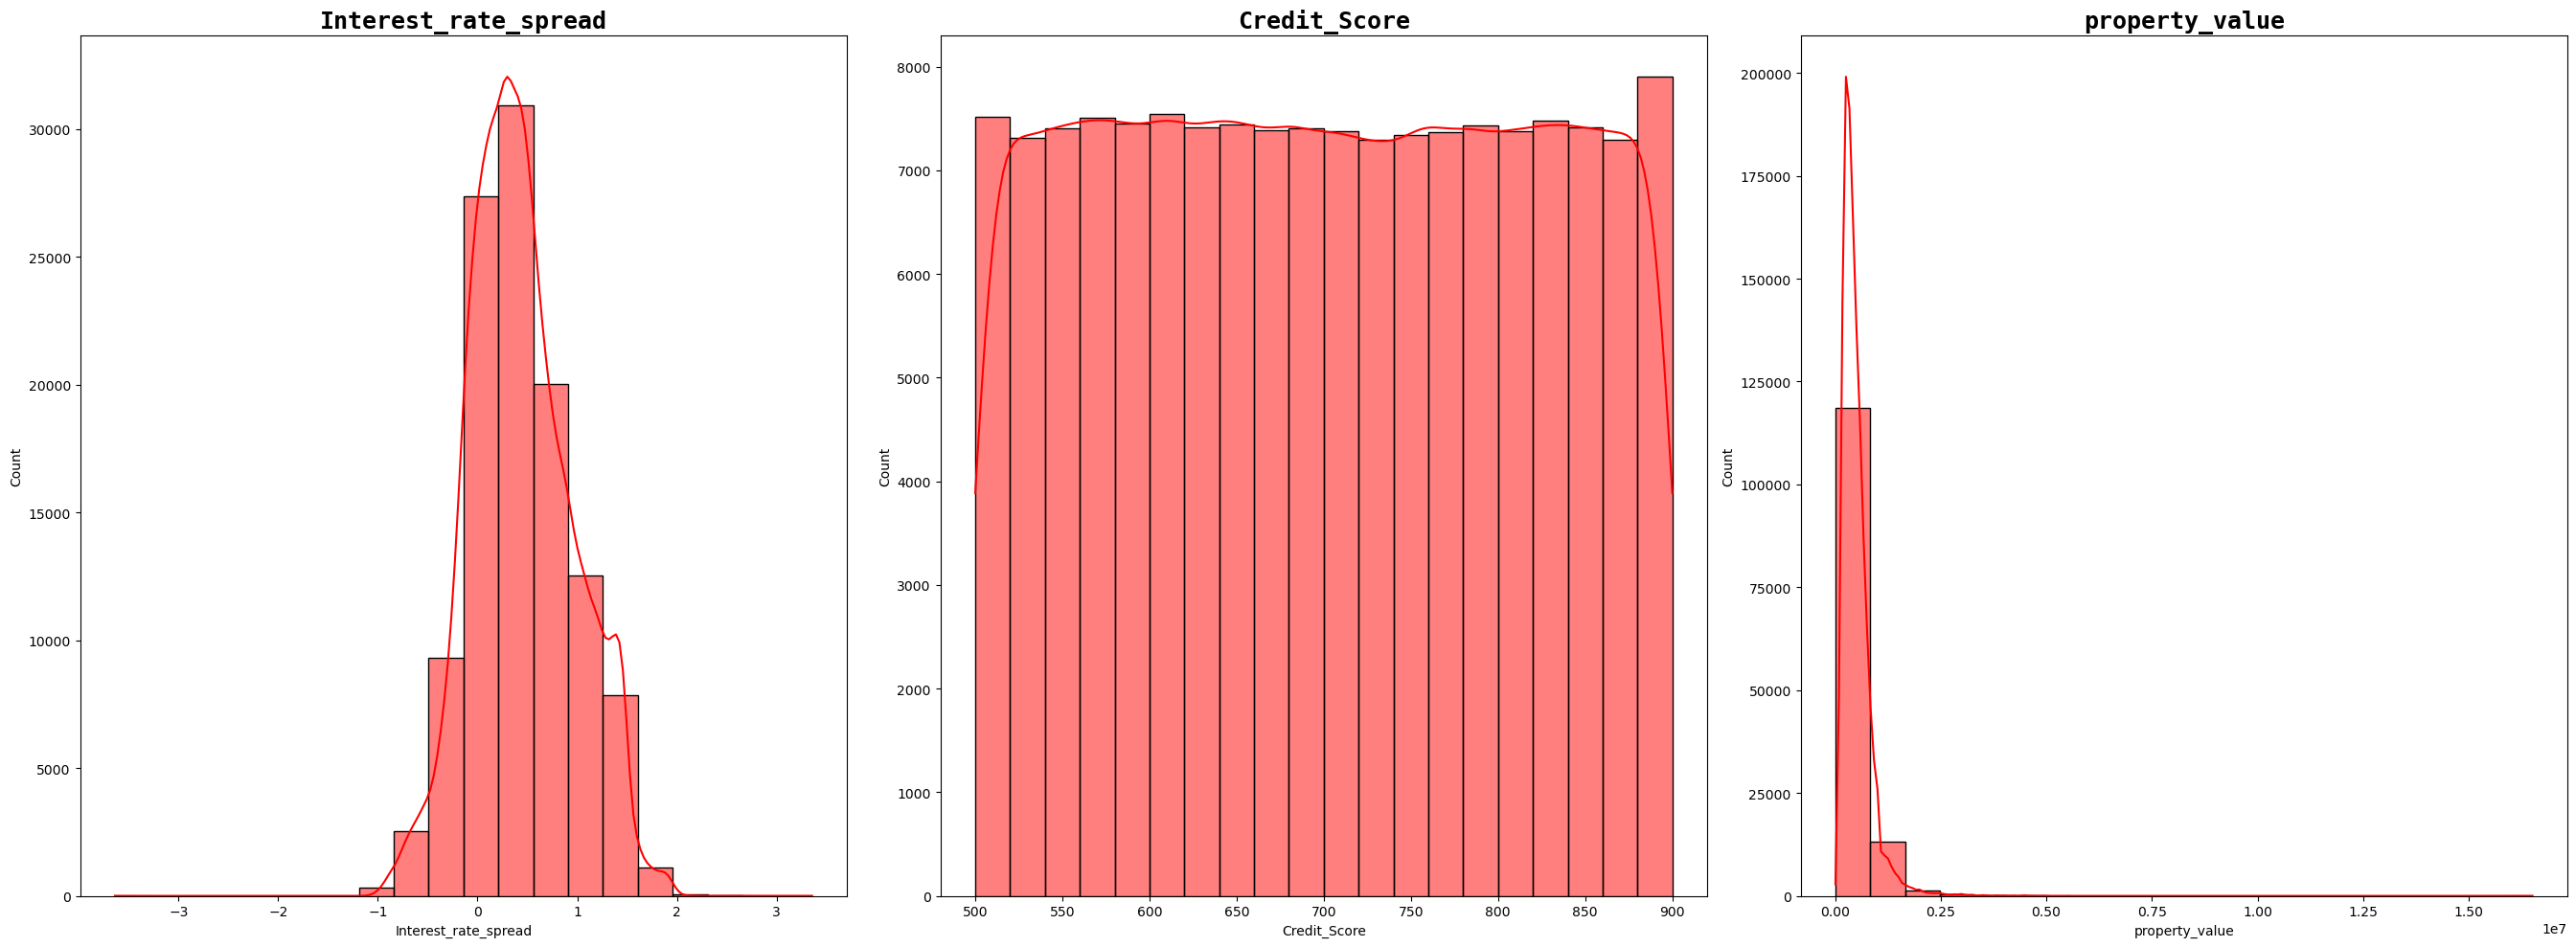

In [30]:
#Using a Histograms to visualize the distribution of the numerical columns.
num_cols = [ 'Interest_rate_spread', 'Credit_Score', 'property_value']

# Verify that the column names exist
print(df.columns)

# Create subplots (1 row, 3 columns)
fig, ax = plt.subplots(1, 3, figsize=(27, 10))

# Loop through each numerical column and plot a histogram
for i, col in enumerate(num_cols):
    # Check if column exists in the DataFrame
    if col in df.columns:
        sns.histplot(data=df, x=col, ax=ax[i], kde=True, color='red', bins=20)
        ax[i].set_title(col, weight="bold", fontsize=18, fontname="monospace")
    else:
        print(f"Column '{col}' not found in the DataFrame")

# Display the plot
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA) 
It helps you understand the data, detect anomalies, test assumptions, and check the underlying structure before proceeding with any modeling or analysis.

In [31]:
#This Selects all columns that contain categorical (text) data.and Extracts the column names of these categorical columns.
cat = df.select_dtypes(include='object').columns
len(cat) #Counts how many categorical columns exist.

21

In [32]:
#Checking for the unique values in the numerical column
for i in cat:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in loan_limit are:  2
The no.of unique values in Gender are:  4
The no.of unique values in approv_in_adv are:  2
The no.of unique values in loan_type are:  3
The no.of unique values in loan_purpose are:  4
The no.of unique values in Credit_Worthiness are:  2
The no.of unique values in open_credit are:  2
The no.of unique values in business_or_commercial are:  2
The no.of unique values in Neg_ammortization are:  2
The no.of unique values in interest_only are:  2
The no.of unique values in lump_sum_payment are:  2
The no.of unique values in construction_type are:  2
The no.of unique values in occupancy_type are:  3
The no.of unique values in Secured_by are:  2
The no.of unique values in total_units are:  4
The no.of unique values in credit_type are:  4
The no.of unique values in co-applicant_credit_type are:  2
The no.of unique values in age are:  7
The no.of unique values in submission_of_application are:  2
The no.of unique values in Region are:  4
The no.of uni

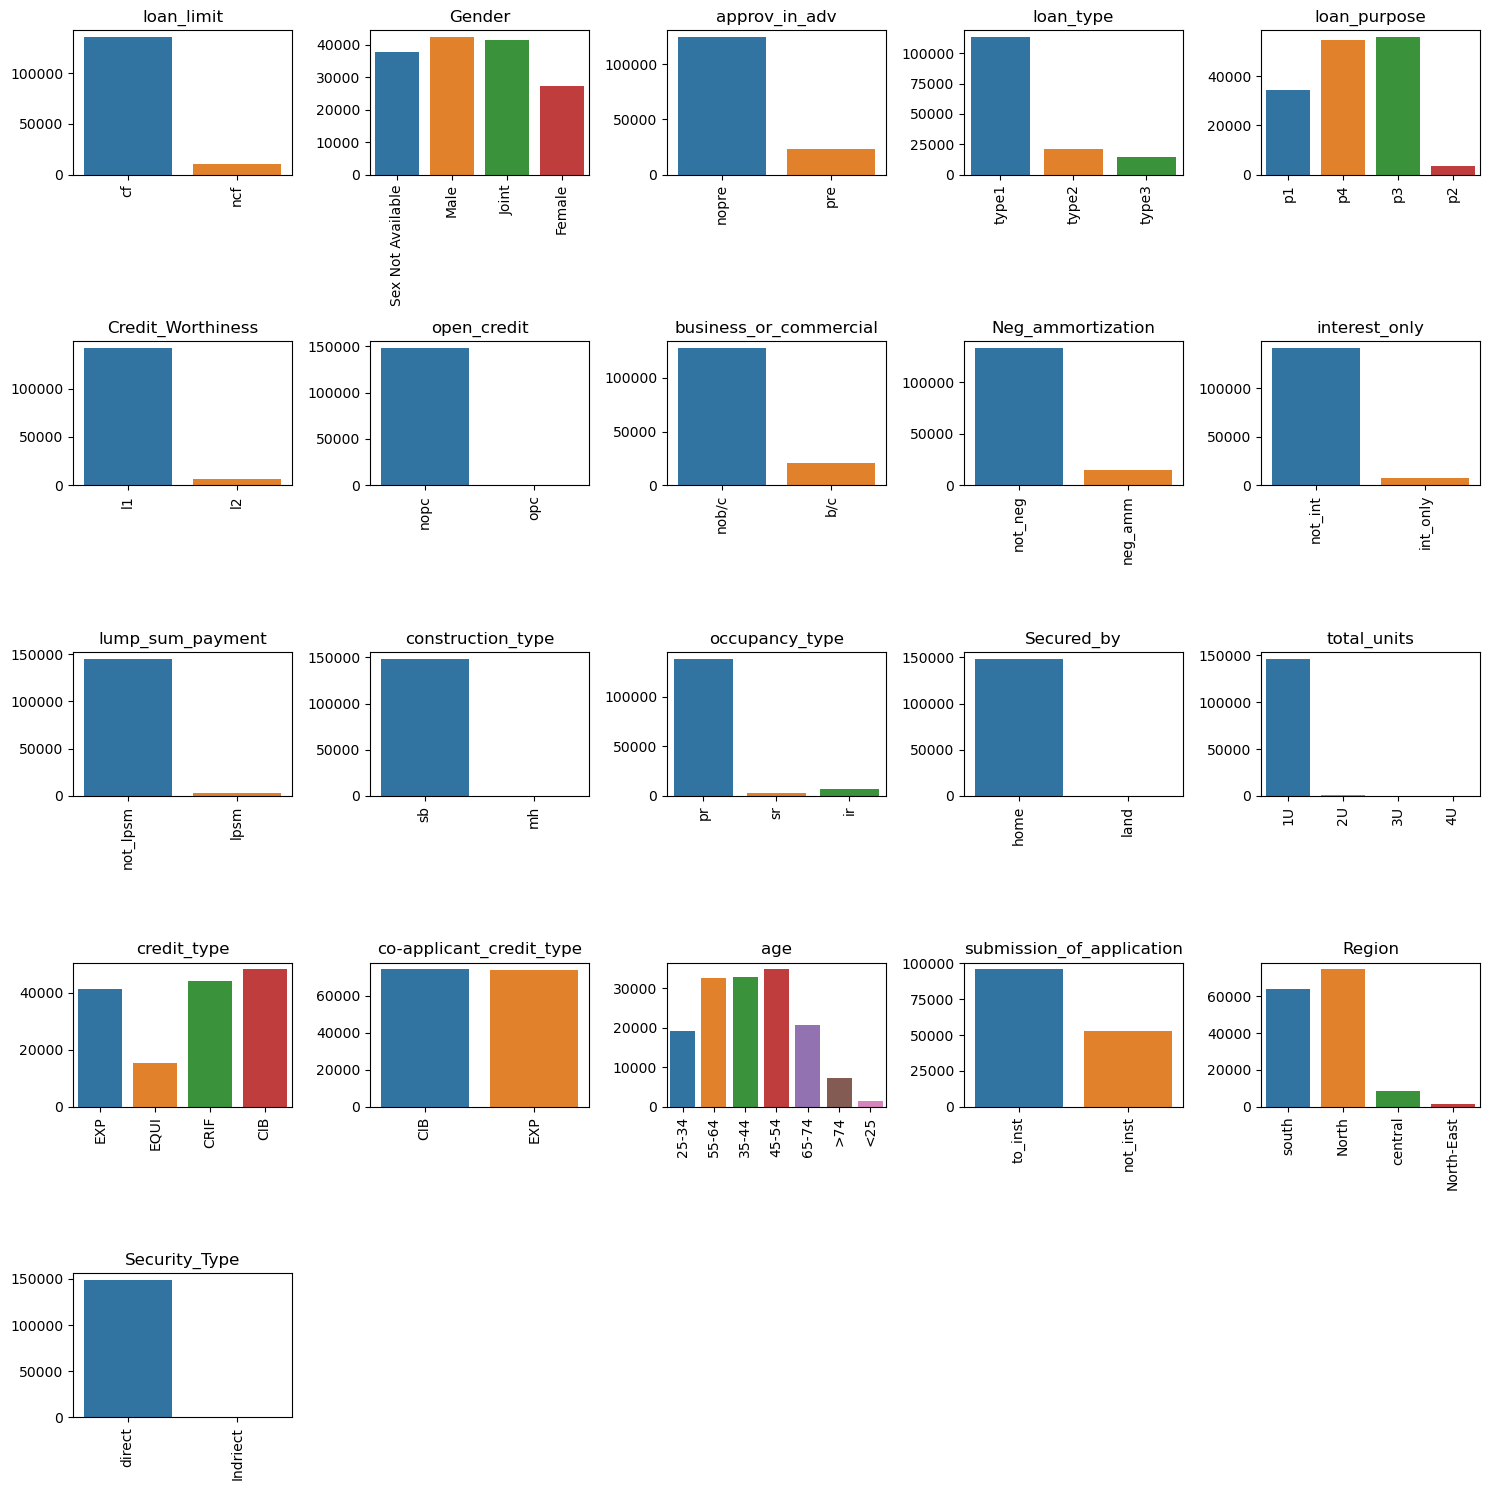

In [33]:
#visualizing the distribution of the categorical columns

num_plots = len(cat)
num_cols = 5
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(cat):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelrotation=90)
for i in range(num_plots, num_rows*num_cols):
    axes[i].set_visible(False)
   
fig.tight_layout()
plt.show()

In [34]:
#visualizing categorical columns 
import numpy as np

num = df.select_dtypes(include=np.number).columns
len(num)

13

In [35]:
#Checking for the unique values in the numerical column
for i in num:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in ID are:  148670
The no.of unique values in year are:  1
The no.of unique values in loan_amount are:  211
The no.of unique values in rate_of_interest are:  131
The no.of unique values in Interest_rate_spread are:  22516
The no.of unique values in Upfront_charges are:  58271
The no.of unique values in term are:  26
The no.of unique values in property_value are:  385
The no.of unique values in income are:  1001
The no.of unique values in Credit_Score are:  401
The no.of unique values in LTV are:  8484
The no.of unique values in Status are:  2
The no.of unique values in dtir1 are:  57


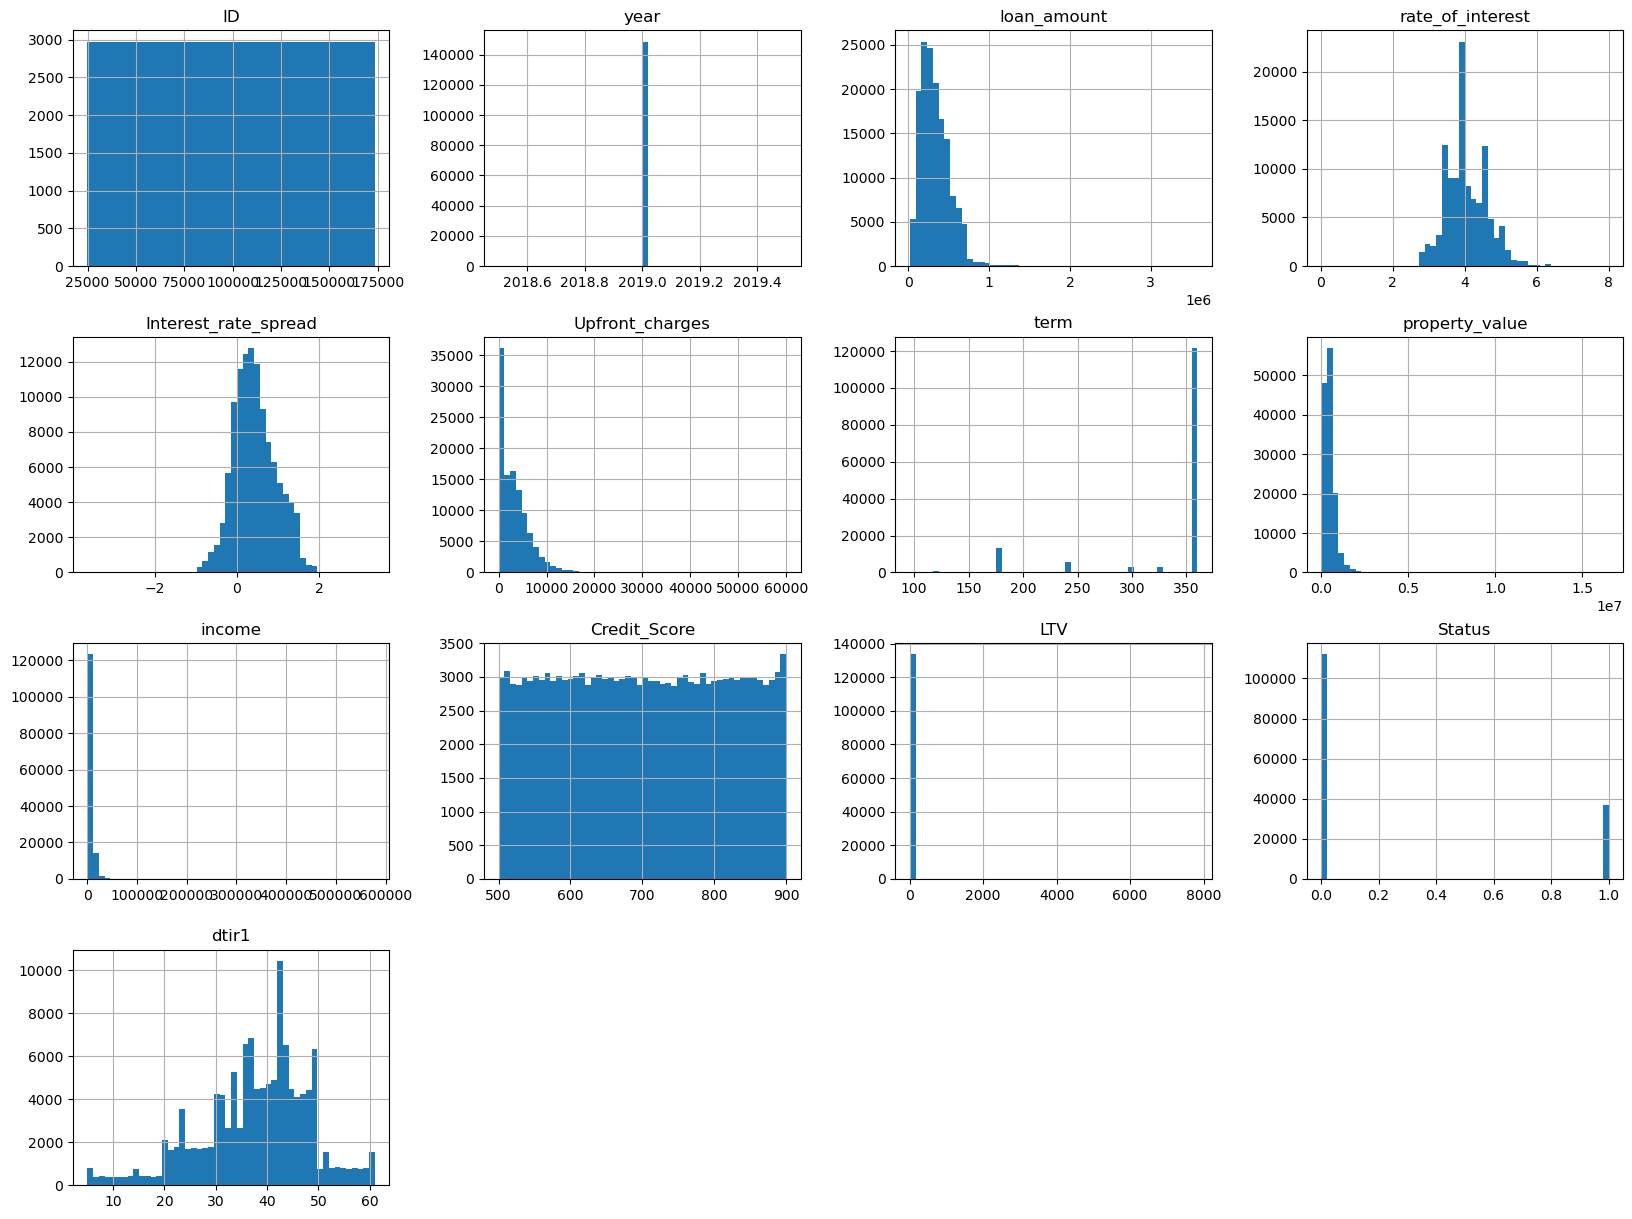

In [36]:
# visualizing the distribution of our numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

In [37]:
df['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [38]:
df['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [39]:
df['approv_in_adv'].value_counts()

nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64

In [40]:
df['loan_type'].value_counts()

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

In [41]:
df['Credit_Worthiness'].value_counts()

# Convert to numeric data
# Correlation

l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64

In [42]:
df['loan_purpose'].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

In [43]:
df['open_credit'].value_counts()

nopc    148114
opc        556
Name: open_credit, dtype: int64

In [44]:
df['business_or_commercial'].value_counts()

nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64

In [45]:
df['Neg_ammortization'].value_counts()

not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64

In [46]:
df['interest_only'].value_counts()

not_int     141560
int_only      7110
Name: interest_only, dtype: int64

In [47]:
df['lump_sum_payment'].value_counts()

not_lpsm    145286
lpsm          3384
Name: lump_sum_payment, dtype: int64

In [48]:
df['occupancy_type'].value_counts() 

pr    138201
ir      7340
sr      3129
Name: occupancy_type, dtype: int64

In [49]:
df['Secured_by'].value_counts()

home    148637
land        33
Name: Secured_by, dtype: int64

In [50]:
df['total_units'].value_counts()

1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64

In [51]:
df['credit_type'].value_counts()

CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64

In [52]:
df['co-applicant_credit_type'].value_counts()

CIB    74392
EXP    74278
Name: co-applicant_credit_type, dtype: int64

In [53]:
df['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [54]:
df['submission_of_application'].value_counts()

to_inst     95814
not_inst    52656
Name: submission_of_application, dtype: int64

In [55]:
df['Region'].value_counts()

North         74722
south         64016
central        8697
North-East     1235
Name: Region, dtype: int64

In [56]:
df['Security_Type'].value_counts()

direct      148637
Indriect        33
Name: Security_Type, dtype: int64

In [57]:
#This will change target variable label to dafaulted or not defaulted instead  of 0 and 1
change ={1: 'defaulted', 0: 'Not defaulted'}
df['Status'] = df ['Status'].replace(change)

[Text(0, 0, '36639'), Text(0, 0, '112031')]

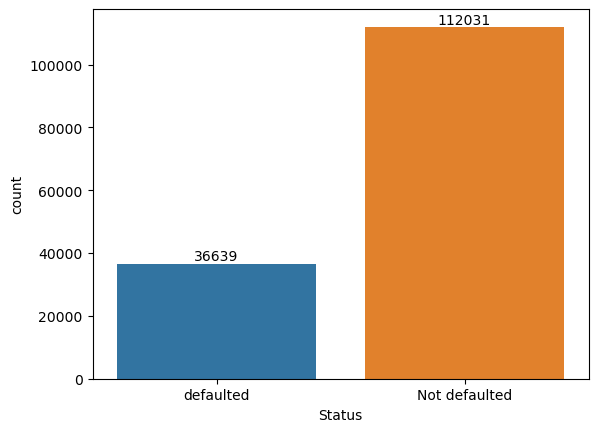

In [58]:
#This creates a count plot (bar chart) to visualize the distribution of the target variable Status 
ax = sns.countplot(x='Status', data=df)
ax.bar_label(ax.containers[0])

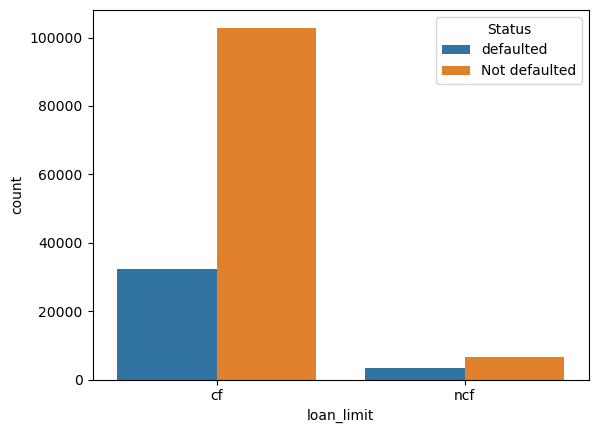

In [59]:
#showing the distribution of loan limit against our target variable
ax=sns.countplot(x= df['loan_limit'], hue = 'Status', data = df)

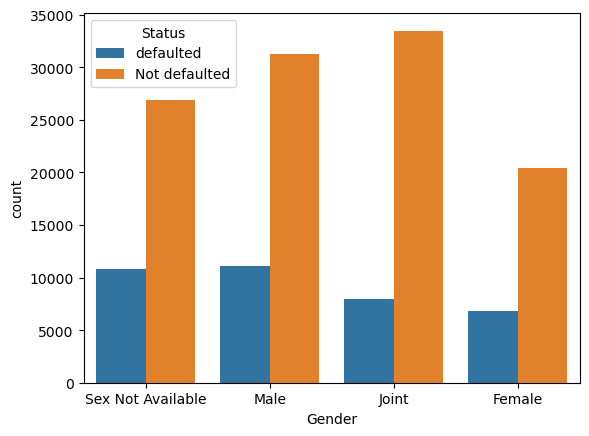

In [60]:
#showing the distribution of interest only against our target variable
ax=sns.countplot(x= df['Gender'], hue = 'Status', data = df)

<Axes: xlabel='approv_in_adv', ylabel='count'>

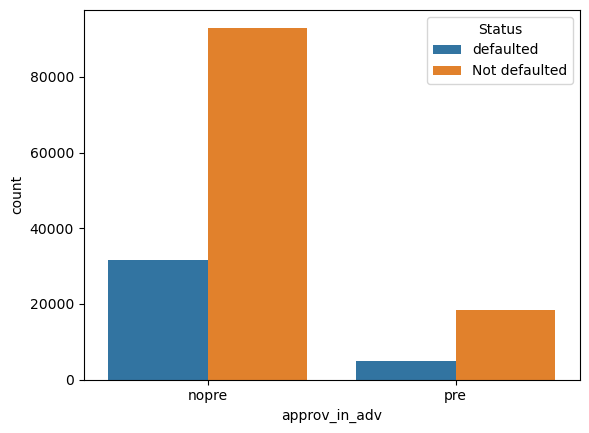

In [61]:
#showing the distribution of approv_in_adv against our target variable
sns.countplot(x= df['approv_in_adv'], hue = 'Status', data = df)

<Axes: xlabel='loan_type', ylabel='count'>

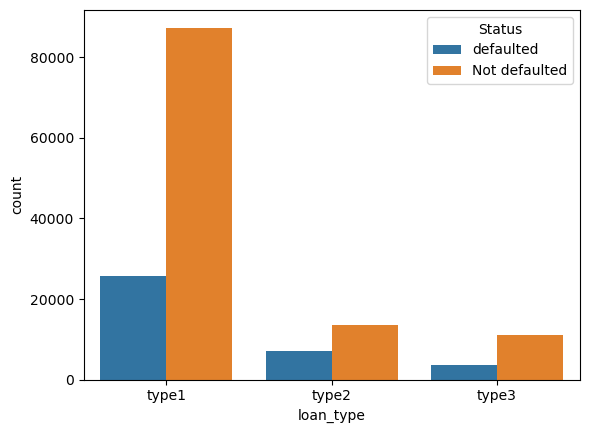

In [62]:
#showing the distribution of approv_in_adv against our target variable
sns.countplot(x= df['loan_type'], hue = 'Status', data = df)

<Axes: xlabel='Credit_Worthiness', ylabel='count'>

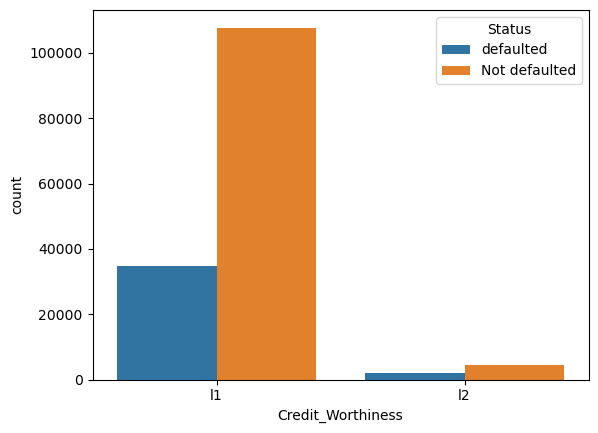

In [63]:
#showing the distribution of credit worthitness against our target variable
sns.countplot(x= df['Credit_Worthiness'], hue = 'Status', data = df)

<Axes: xlabel='loan_purpose', ylabel='count'>

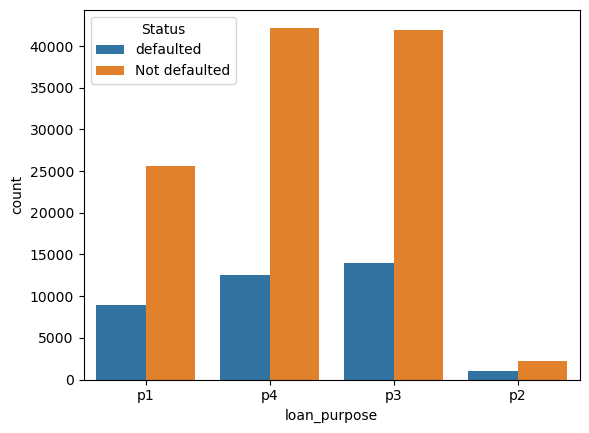

In [64]:
#showing the distribution of loan purpose against our target variable
sns.countplot(x= df['loan_purpose'], hue = 'Status', data = df)

<Axes: xlabel='open_credit', ylabel='count'>

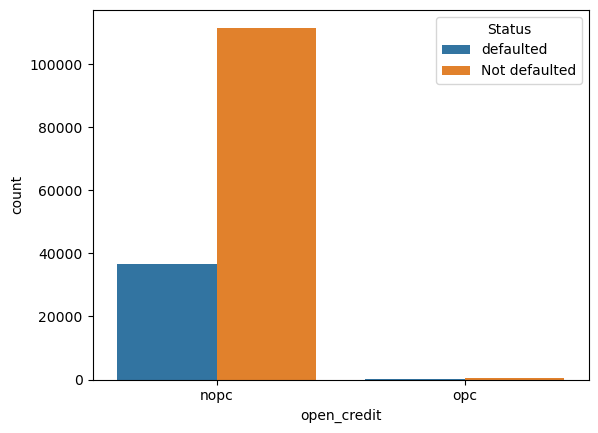

In [65]:
#showing the distribution of open credit against our target variable
sns.countplot(x= df['open_credit'], hue = 'Status', data = df)

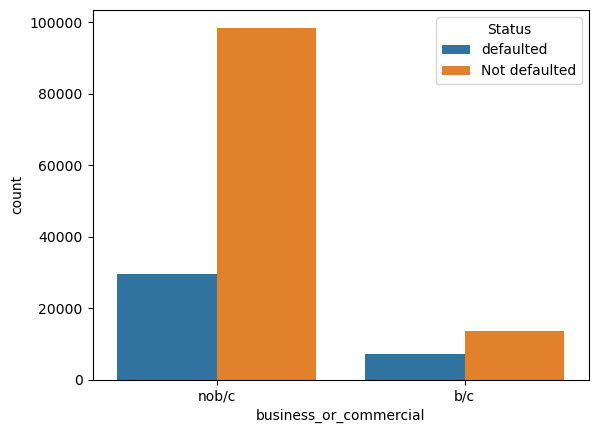

In [66]:
#showing the distribution of business_or_commercial against our target variable
ax=sns.countplot(x= df['business_or_commercial'], hue = 'Status', data = df)

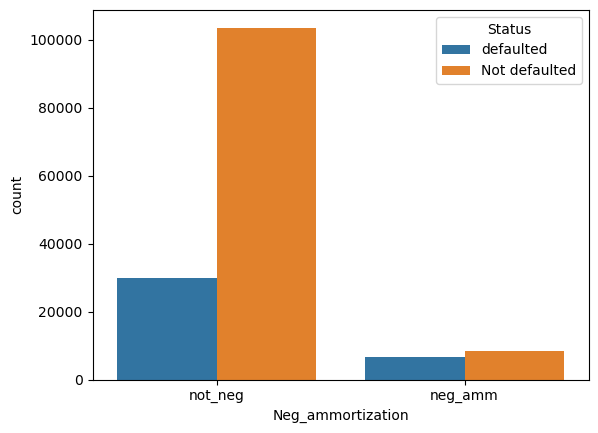

In [67]:
#showing the distribution of Neg_ammortization against our target variable
ax=sns.countplot(x= df['Neg_ammortization'], hue = 'Status', data = df)

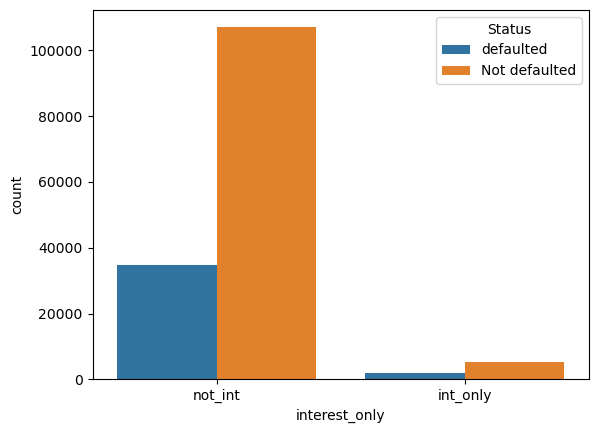

In [68]:
#showing the distribution of interest only against our target variable
ax=sns.countplot(x= df['interest_only'], hue = 'Status', data = df)

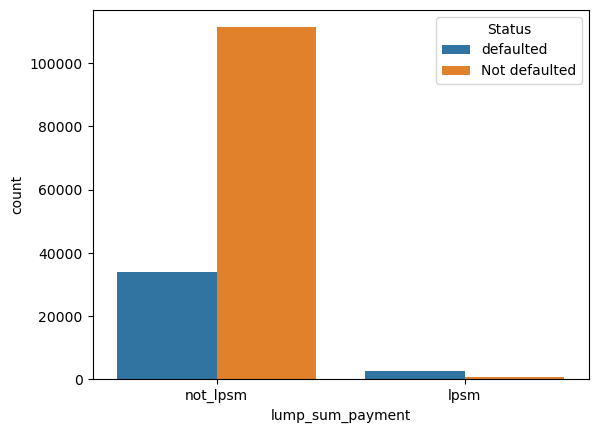

In [69]:
#showing the distribution of lump sum payment against our target variable
ax=sns.countplot(x= df['lump_sum_payment'], hue = 'Status', data = df)

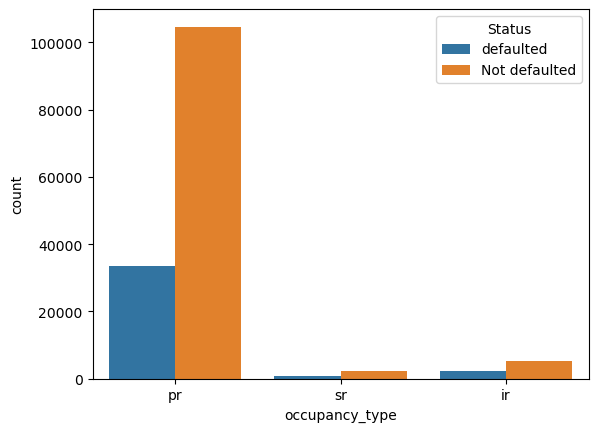

In [70]:
#showing the distribution of occupancy_type against our target variable
ax=sns.countplot(x= df['occupancy_type'], hue = 'Status', data = df)

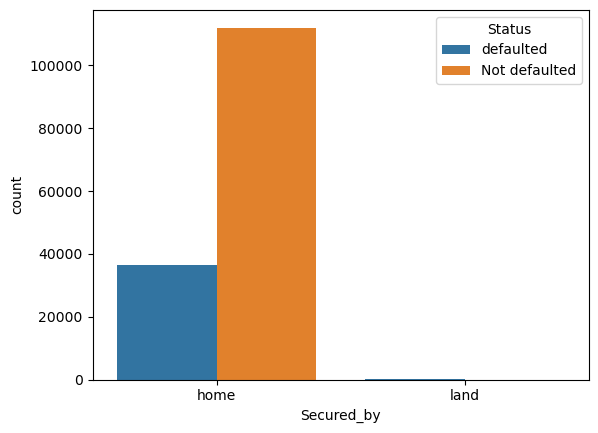

In [71]:
#showing the distribution of secured by against our target variable
ax=sns.countplot(x= df['Secured_by'], hue = 'Status', data = df)

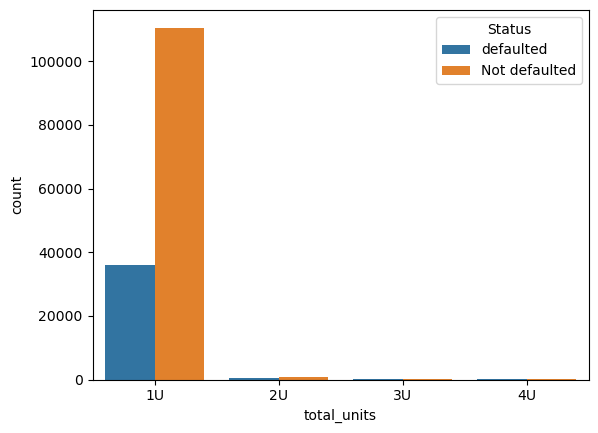

In [72]:
#showing the distribution of total units against our target variable
ax=sns.countplot(x= df['total_units'], hue = 'Status', data = df)

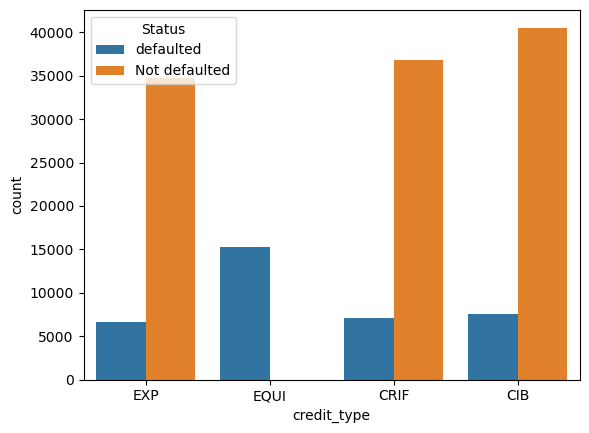

In [73]:
#showing the distribution of credit type against our target variable
ax=sns.countplot(x= df['credit_type'], hue = 'Status', data = df)

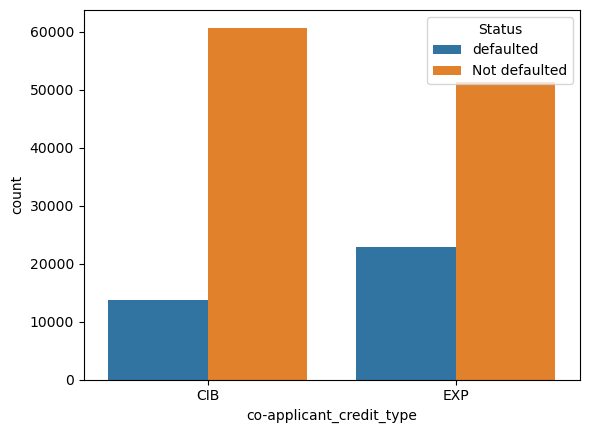

In [74]:
#showing the distribution of credit type against our target variable
ax=sns.countplot(x= df['co-applicant_credit_type'], hue = 'Status', data = df)

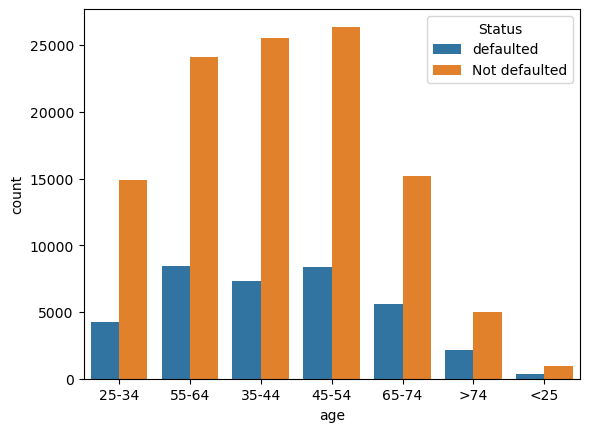

In [75]:
#showing the distribution of age against our target variable
ax=sns.countplot(x= df['age'], hue = 'Status', data = df)

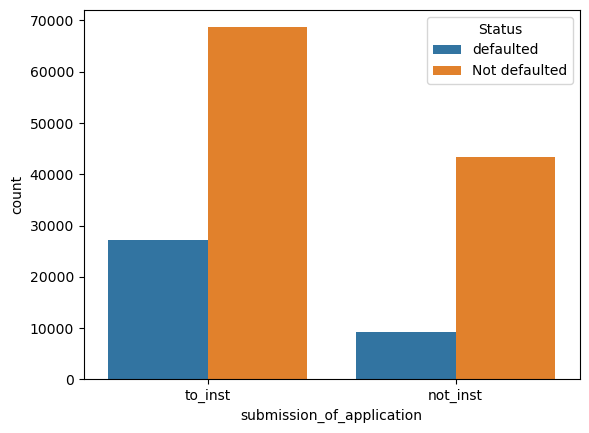

In [76]:
#showing the distribution of submission_of_application against our target variable
ax=sns.countplot(x= df['submission_of_application'], hue = 'Status', data = df)

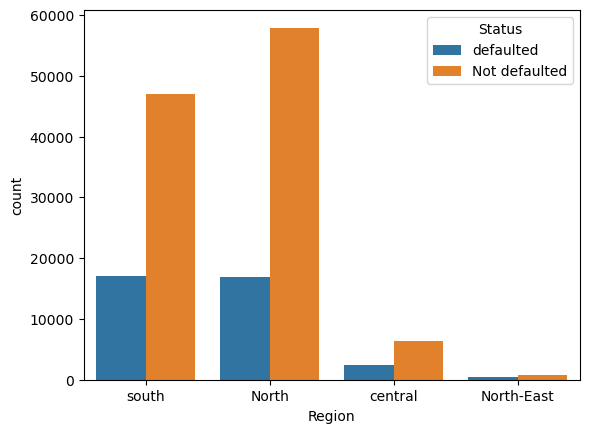

In [77]:
#showing the distribution of region against our target variable
ax=sns.countplot(x= df['Region'], hue = 'Status', data = df)

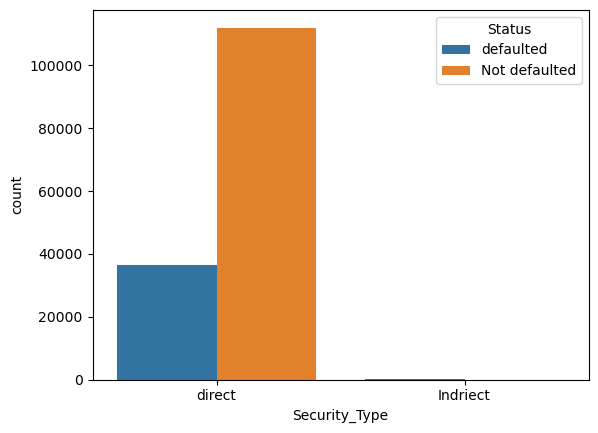

In [78]:
#showing the distribution of Security_Type against our target variable
ax=sns.countplot(x= df['Security_Type'], hue = 'Status', data = df)

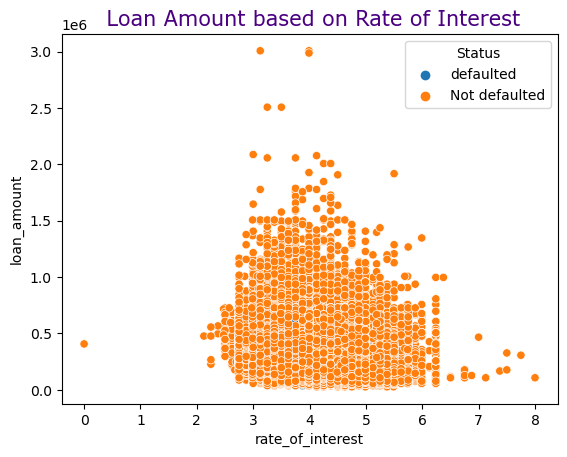

In [79]:
#scatter plot to show the relationship between loan amount and loan's interest rate 
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='rate_of_interest',y='loan_amount', hue = 'Status')
plt.title(' Loan Amount based on Rate of Interest',color='indigo',font='Verdana',fontsize= 15);
plt.show()

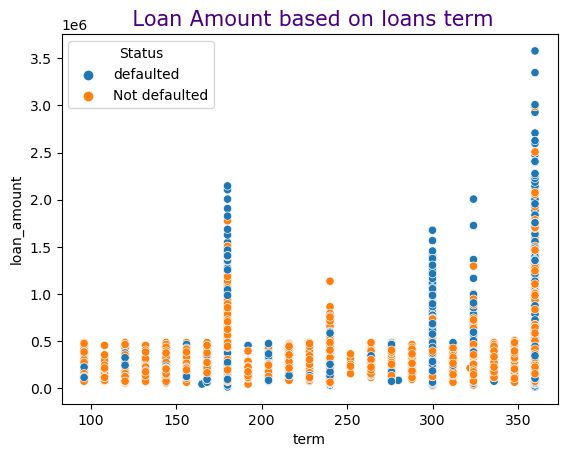

In [80]:
#scatter plot to show the relationship between loan amount and loan's term 
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='term',y='loan_amount', hue = 'Status')
plt.title(' Loan Amount based on loans term',color='indigo',font='Verdana',fontsize= 15);
plt.show()

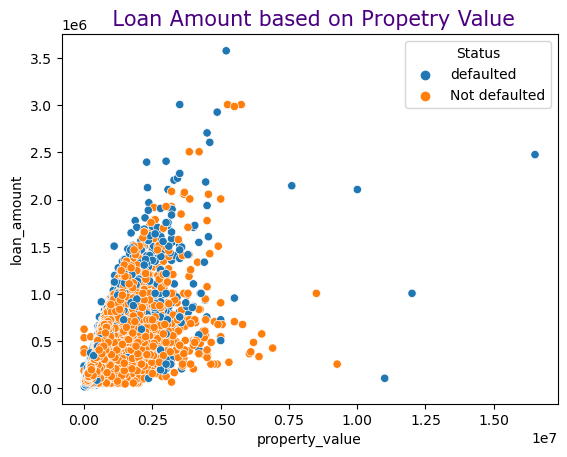

In [81]:
#scatter plot to show the relationship between loan amount and applicant's property value 
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='property_value',y='loan_amount', hue = 'Status')
plt.title(' Loan Amount based on Propetry Value',color='indigo',font='Verdana',fontsize= 15);
plt.show()

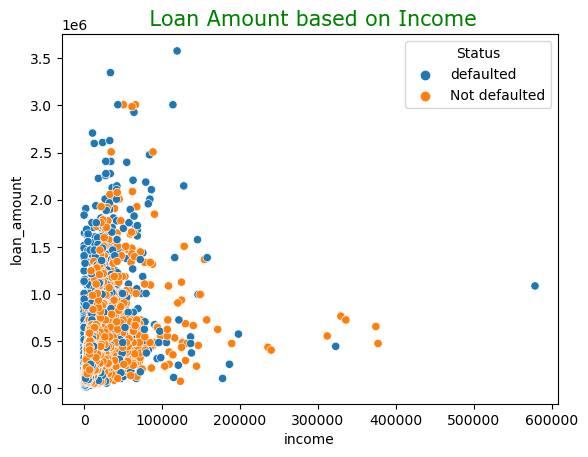

In [82]:
#scatter plot to show the relationship between loan amount and applicant's income
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='income',y='loan_amount', hue = 'Status')
plt.title(' Loan Amount based on Income',color='Green',font='Verdana', fontsize=15);
plt.show()

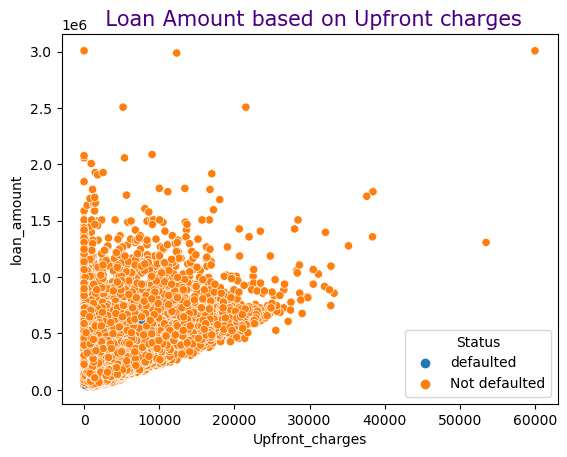

In [83]:
#scatter plot to show the relationship between loan amount and loan's Upfront charges
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='Upfront_charges',y='loan_amount', hue = 'Status')
plt.title(' Loan Amount based on Upfront charges',color='indigo',font='Verdana',fontsize= 15);
plt.show()

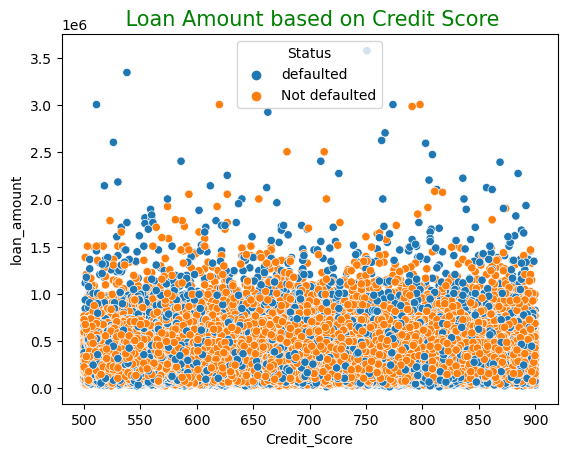

In [84]:
#scatter plot to show the relationship between loan amount and applicant's credit score
fig,ax = plt.subplots()
sns.scatterplot(data=df, x='Credit_Score',y='loan_amount', hue = 'Status')

plt.title(' Loan Amount based on Credit Score',color='Green',font='DejaVu Sans', fontsize= 15);
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

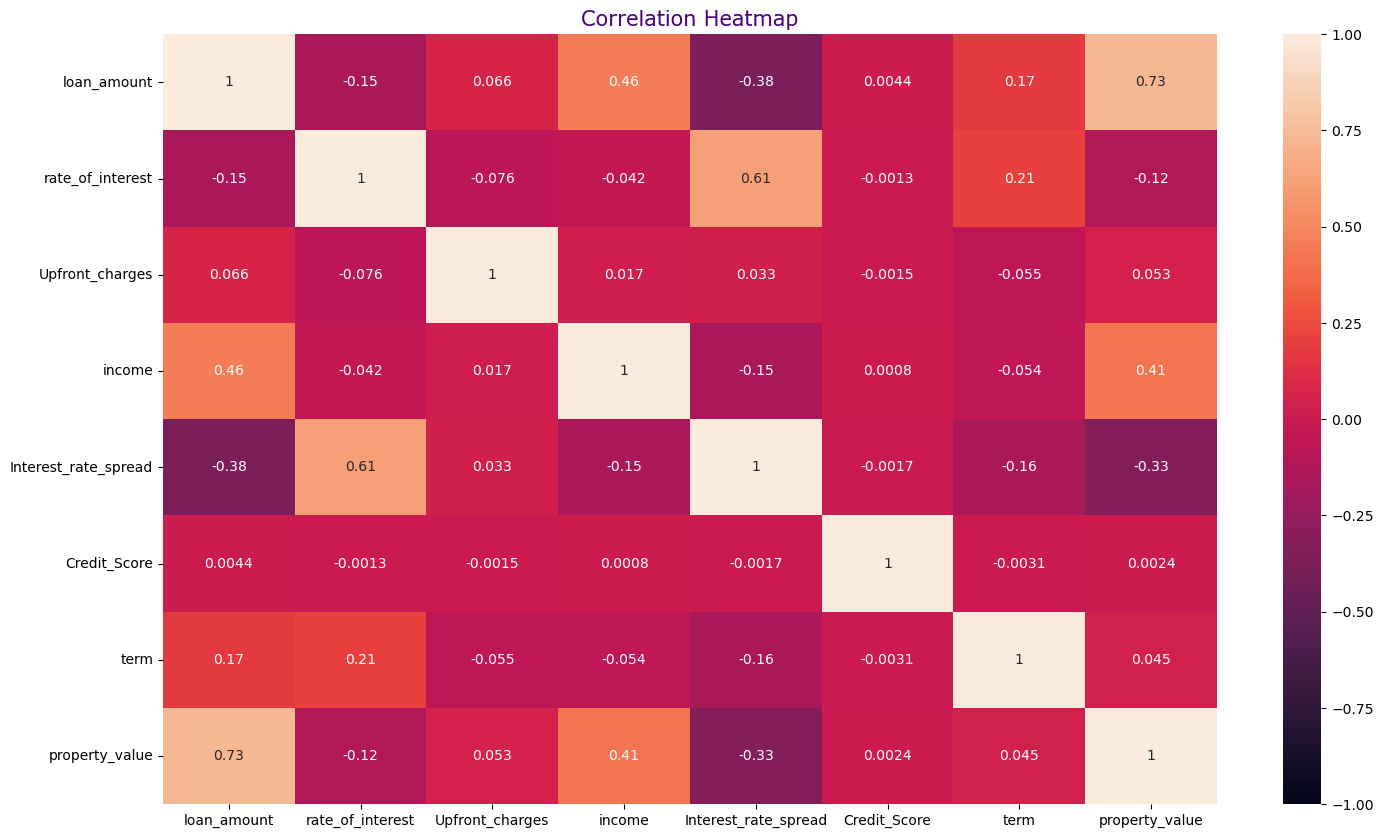

In [85]:
#This shows the Correlation matrix, it displays the correlation between our numerical values
num_cols=['loan_amount', 'rate_of_interest', 'Upfront_charges', 'income', 'Interest_rate_spread', 'Credit_Score', 'term','property_value']
corr_matrix =df[num_cols].corr()
plt.figure(figsize=(17,10))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap',color='indigo', font='Verdana', fontsize=15)

# FEATURE ENGINEERING 
 the goal of feature engineering is to improve the model's predictive power, make the model more interpretable, and reduce the complexity of the data so that the machine learning algorithm can focus on learning meaningful patterns.

In [86]:
#Drop unwanted column
loan_new = df.drop (['ID', 'year',], axis = 1)

In [87]:
# Getting the list of columns with missing values
missing_columns = [col for col in loan_new.columns if loan_new[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [88]:
#Replacing numerical columns with missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
loan_new[['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1',]] = imputer.fit_transform(loan_new[['rate_of_interest','Interest_rate_spread','Upfront_charges','term','property_value','income','LTV','dtir1']])

In [89]:
#This displays the new data
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           148670 non-null  float64
 10  Interest_rate_spread       148670 non-null  float64
 11  Upfront_charges            148670 non-null  float64
 12  term                       148670 non-null  float64
 13  Neg_ammortization          14

In [90]:
#Replcaing the categorical column with missing value with mode
for column in df.select_dtypes(include='object'):
    loan_new[column].fillna(loan_new[column].mode()[0], inplace=True)

In [91]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148670 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           148670 non-null  float64
 10  Interest_rate_spread       148670 non-null  float64
 11  Upfront_charges            148670 non-null  float64
 12  term                       148670 non-null  float64
 13  Neg_ammortization          14

In [92]:
#Checking for columns with mising value in the new dataset
loan_new.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

# ENCODING 
this is the process of converting categorical data (data that consists of categories or labels) into a numerical format so that machine learning algorithms can understand and process it.

In [93]:
#calling the columns with data to be encoded
change_dtype = ['Security_Type', 'Region', 'credit_type', 'approv_in_adv', 'business_or_commercial'
,'open_credit', 'loan_purpose', 'loan_type','Gender', 'age', 'submission_of_application', 'Credit_Worthiness', 'Neg_ammortization', 'interest_only', 'loan_limit', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'co-applicant_credit_type', 'STatus' ]
change_dtype

['Security_Type',
 'Region',
 'credit_type',
 'approv_in_adv',
 'business_or_commercial',
 'open_credit',
 'loan_purpose',
 'loan_type',
 'Gender',
 'age',
 'submission_of_application',
 'Credit_Worthiness',
 'Neg_ammortization',
 'interest_only',
 'loan_limit',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'co-applicant_credit_type',
 'STatus']

In [94]:
loan_new['age'].value_counts()

45-54    34920
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [95]:
#normalizing the age distribution
loan_new['age']=loan_new['age'].map(loan_new['age'].value_counts(normalize=True))

In [96]:
#changing categorical features into numerical values
loan_new['loan_limit'].replace({'ncf':0,'cf':1}, inplace =True)
loan_new['Gender'].replace({'Male':0,'Female':1,'Joint':2, 'Sex Not Available':3}, inplace =True)
loan_new['approv_in_adv'].replace({'nopre':0,'pre':1}, inplace =True)
loan_new['loan_type'].replace({'type1':0,'type2':1,'type3':2}, inplace =True)
loan_new['loan_purpose'].replace({'p1':0,'p2':1,'p3':2,'p4':3}, inplace =True)
loan_new['Credit_Worthiness'].replace({'l1':0,'l2':1}, inplace =True)
loan_new['open_credit'].replace({'nopc':0,'opc':1}, inplace =True)
loan_new['business_or_commercial'].replace({'nob/c':0,'b/c':1}, inplace =True)
loan_new['Neg_ammortization'].replace({'not_neg':0,'neg_amm':1}, inplace =True)
loan_new['interest_only'].replace({'not_int':0,'int_only':1}, inplace =True)
loan_new['lump_sum_payment'].replace({'not_lpsm':0,'lpsm':1}, inplace =True)
loan_new['construction_type'].replace({'sb':0,'mh':1}, inplace =True)
loan_new['occupancy_type'].replace({'ir':0,'pr':1,'sr':2}, inplace =True)
loan_new['Secured_by'].replace({'home':0,'land':1}, inplace =True)
loan_new['total_units'].replace({'1U':0,'2U':1,'3U':2,'4U':3}, inplace =True)
loan_new['credit_type'].replace({'CIB':0,'EXP':1,'CRIF':2,'EQUI':3}, inplace =True)
loan_new['co-applicant_credit_type'].replace({'CIB':0,'EXP':1}, inplace =True)
loan_new['submission_of_application'].replace({'not_inst':0,'to_inst':1}, inplace =True)
loan_new['Region'].replace({'North':0,'south':1,'North-East':2,'central':3}, inplace=True)
loan_new['Security_Type'].replace({'Indriect':0,'direct':1}, inplace =True)
loan_new['Status'].replace({'defaulted':1 ,  'Not defaulted':0}, inplace=True)

In [97]:
#Checking for data types after encoding
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  int64  
 1   Gender                     148670 non-null  int64  
 2   approv_in_adv              148670 non-null  int64  
 3   loan_type                  148670 non-null  int64  
 4   loan_purpose               148670 non-null  int64  
 5   Credit_Worthiness          148670 non-null  int64  
 6   open_credit                148670 non-null  int64  
 7   business_or_commercial     148670 non-null  int64  
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           148670 non-null  float64
 10  Interest_rate_spread       148670 non-null  float64
 11  Upfront_charges            148670 non-null  float64
 12  term                       148670 non-null  float64
 13  Neg_ammortization          14

In [98]:
#Displaying the top 10 rows after encoding
loan_new.head(10)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,1,3,0,0,0,0,0,0,116500,3.990,...,1,758,0,0.128755,1,98.728814,1,1,1,45.0
1,1,0,0,1,0,0,0,1,206500,3.990,...,3,552,1,0.218834,1,75.135870,0,1,1,39.0
2,1,0,1,0,0,0,0,0,406500,4.560,...,1,834,0,0.220744,1,80.019685,1,1,0,46.0
3,1,0,0,0,3,0,0,0,456500,4.250,...,1,587,0,0.234883,0,69.376900,0,1,0,42.0
4,1,2,1,0,0,0,0,0,696500,4.000,...,2,602,1,0.128755,0,91.886544,0,1,0,39.0
5,1,2,1,0,0,0,0,0,706500,3.990,...,1,864,1,0.220744,0,70.089286,0,1,0,40.0
6,1,2,1,0,2,0,0,0,346500,4.500,...,1,860,1,0.218834,1,79.109589,0,1,0,44.0
7,1,1,0,0,3,0,0,0,266500,4.125,...,0,863,0,0.218834,1,86.525974,0,1,0,42.0
8,1,2,0,0,2,0,0,0,376500,4.875,...,0,580,1,0.218834,1,78.765690,3,1,0,44.0
9,1,3,0,2,2,0,0,0,436500,3.490,...,0,788,1,0.218834,1,63.444767,1,1,0,30.0


In [101]:
#Splitting the data to Train and Test Set
#80% training and 20% test

x = loan_new.drop('Status', axis = 1)#features
y = loan_new['Status']#target variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# FEATURE SELECTION (Evaluation)
This helps us work with only fetures that are statistically relevant to the data set. Using ANOVA F-value to select the top 10 features relevant to our target varibles.

In [106]:
# Import the necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 'Status' is the target variable
X = df.drop(columns=['Status'])  # Features (excluding the target variable)
y = df['Status']  # Target variable (e.g., loan approval status)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ANOVA F-test for feature selection
# Select the top 10 features based on F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get the selected feature names
selected_columns = X.columns[selector.get_support()]

# Display the top 10 selected features
print("Top 10 selected features based on ANOVA F-value:")
print(selected_columns)


Top 10 selected features based on ANOVA F-value:
Index(['business_or_commercial', 'Upfront_charges', 'Neg_ammortization',
       'lump_sum_payment', 'property_value', 'income', 'credit_type',
       'co-applicant_credit_type', 'submission_of_application', 'dtir1'],
      dtype='object')


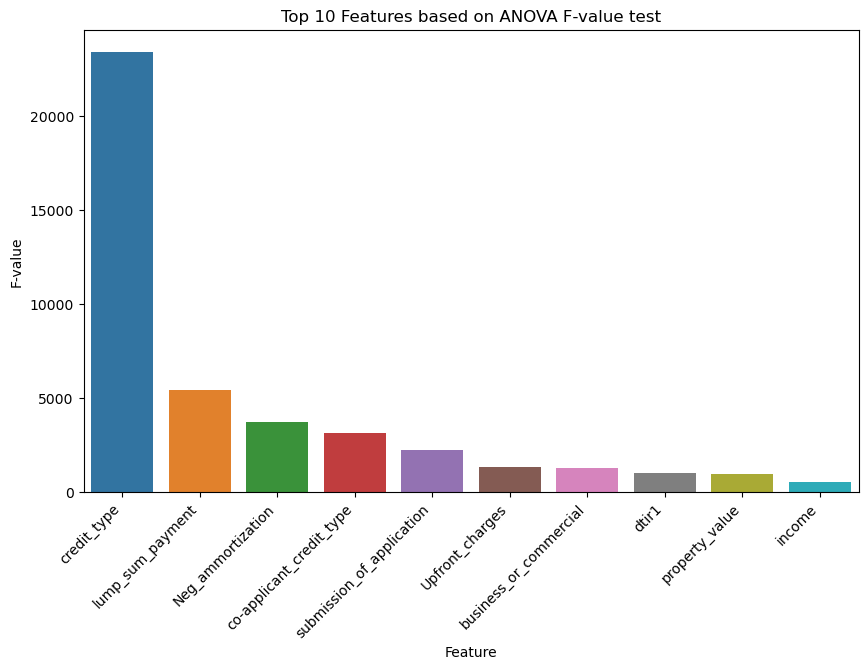

In [103]:
# select the columns statistical relevance to our target variable using ANOVA F-value

# create a new DataFrame with the selected columns
df = loan_new

# split the data into features and target
x = df.drop(['Status'], axis=1)
y = df['Status']

# perform ANOVA F-value test
f_values, p_values = f_classif(x, y)

# create a DataFrame with the F-values and corresponding feature names
f_df = pd.DataFrame({'feature': x.columns, 'F-value': f_values})

# sort the DataFrame by F-value in descending order and select the top 10 features
top_features = f_df.sort_values(by='F-value', ascending=False).head(10)

# plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='F-value', data=top_features)
plt.title('Top 10 Features based on ANOVA F-value test')
plt.xlabel('Feature')
plt.ylabel('F-value')
plt.xticks(rotation=45, ha='right')
plt.show()

In [104]:
#Standardizing the data using Standard Scaler

# Extract the top 10 features
top_features = ['business_or_commercial', 'Upfront_charges', 'Neg_ammortization', 'lump_sum_payment', 'property_value', 'income', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'dtir1']

# Keep only the top 10 features in the training and testing data
x_train = x_train[top_features]
x_test = x_test[top_features]

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaler, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaler, columns=x_test.columns)


display(x_train.head())
display(x_test.head())

,business_or_commercial,Upfront_charges,Neg_ammortization,lump_sum_payment,property_value,income,credit_type,co-applicant_credit_type,submission_of_application,dtir1
0,-0.401131,-0.154569,-0.336615,-0.153647,-1.110773,-0.683220,-1.177081,0.999765,0.739835,-2.684156
1,-0.401131,-0.164744,-0.336615,-0.153647,1.274777,0.046618,-0.177229,-1.000235,-1.351652,0.524081
2,2.492950,0.035233,-0.336615,-0.153647,-0.994405,-0.738651,-1.177081,-1.000235,0.739835,0.420590
3,-0.401131,-0.164744,-0.336615,-0.153647,-0.587116,0.203672,-0.177229,-1.000235,-1.351652,0.317098
4,-0.401131,-0.416511,-0.336615,-0.153647,0.983856,0.314533,0.822624,0.999765,-1.351652,-0.303851


,business_or_commercial,Upfront_charges,Neg_ammortization,lump_sum_payment,property_value,income,credit_type,co-applicant_credit_type,submission_of_application,dtir1
0,2.492950,-0.212260,-0.336615,-0.153647,-1.023497,-0.794082,-0.177229,-1.000235,0.739835,0.317098
1,-0.401131,-0.192848,-0.336615,-0.153647,-0.645300,-0.156628,-0.177229,0.999765,0.739835,0.627573
2,-0.401131,0.299819,-0.336615,-0.153647,0.634751,-0.701697,0.822624,0.999765,0.739835,0.317098
3,-0.401131,0.134992,-0.336615,-0.153647,0.634751,-0.193582,-0.177229,0.999765,0.739835,-0.614326
4,-0.401131,-1.090074,-0.336615,-0.153647,1.012948,0.037379,-0.177229,-1.000235,-1.351652,1.041539


In [105]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train_scaler.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (118936, 10)
The shape of x_test_scaler is:  (29734, 10)
The shape of y_train is:  (118936,)
The shape of y_test is:  (29734,)


# MODEL IMPLEMENTATION
This is basically preparing the models.

In [111]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Assuming 'x_train_scaler', 'x_test_scaler', 'y_train', and 'y_test' are already defined

# Initialize models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
gnb = GaussianNB()

# List of models
model_list = [lr, rf, xgb, gnb]

# Lists to store training and testing accuracies
train_acc = []
test_acc = []

# Iterate through each model, train it, and calculate accuracy
for model in model_list:
    # Fit the model on the training data
    model.fit(x_train_scaler, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(x_train_scaler)
    y_test_pred = model.predict(x_test_scaler)
    
    # Calculate accuracy for training and testing sets
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Print the results for training and testing accuracies
for idx, model in enumerate(model_list):
    print(f"{model.__class__.__name__} - Train Accuracy: {train_acc[idx]:.4f}, Test Accuracy: {test_acc[idx]:.4f}")


LogisticRegression - Train Accuracy: 0.8281, Test Accuracy: 0.8290
RandomForestClassifier - Train Accuracy: 0.9989, Test Accuracy: 0.9770
XGBClassifier - Train Accuracy: 0.9808, Test Accuracy: 0.9782
GaussianNB - Train Accuracy: 0.9085, Test Accuracy: 0.9088


In [112]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score


# Lists to store precision and recall scores
train_precision = []
test_precision = []
train_recall = []
test_recall = []

# Iterate through each model, train it, and calculate precision and recall
for model in model_list:
    # Fit the model on the training data
    model.fit(x_train_scaler, y_train)
    
    # Predict on training and testing data
    y_train_pred = model.predict(x_train_scaler)
    y_test_pred = model.predict(x_test_scaler)
    
    # Calculate precision for training and testing sets
    train_precision.append(precision_score(y_train, y_train_pred, average='binary'))  # For binary classification
    test_precision.append(precision_score(y_test, y_test_pred, average='binary'))  # For binary classification
    
    # Calculate recall for training and testing sets
    train_recall.append(recall_score(y_train, y_train_pred, average='binary'))  # For binary classification
    test_recall.append(recall_score(y_test, y_test_pred, average='binary'))  # For binary classification

# Print the results for precision and recall
for idx, model in enumerate(model_list):
    print(f"{model.__class__.__name__} - "
          f"Train Precision: {train_precision[idx]:.4f}, Test Precision: {test_precision[idx]:.4f}, "
          f"Train Recall: {train_recall[idx]:.4f}, Test Recall: {test_recall[idx]:.4f}")


LogisticRegression - Train Precision: 0.7885, Test Precision: 0.7819, Train Recall: 0.4162, Test Recall: 0.4130
RandomForestClassifier - Train Precision: 0.9967, Test Precision: 0.9246, Train Recall: 0.9988, Test Recall: 0.9860
XGBClassifier - Train Precision: 0.9286, Test Precision: 0.9202, Train Recall: 0.9992, Test Recall: 0.9968
GaussianNB - Train Precision: 0.8624, Test Precision: 0.8597, Train Recall: 0.7493, Test Recall: 0.7472


In [113]:
# Import necessary libraries
from sklearn.metrics import roc_auc_score


# Lists to store AU-ROC scores
train_roc_auc = []
test_roc_auc = []

# Iterate through each model, train it, and calculate AU-ROC score
for model in model_list:
    # Fit the model on the training data
    model.fit(x_train_scaler, y_train)
    
    # Predict on training and testing data (probability scores are needed for AU-ROC)
    # For binary classification, use predict_proba to get probabilities
    y_train_prob = model.predict_proba(x_train_scaler)[:, 1]  # Probability of the positive class
    y_test_prob = model.predict_proba(x_test_scaler)[:, 1]  # Probability of the positive class
    
    # Calculate AU-ROC score for training and testing sets
    train_roc_auc.append(roc_auc_score(y_train, y_train_prob))
    test_roc_auc.append(roc_auc_score(y_test, y_test_prob))

# Print the results for AU-ROC scores
for idx, model in enumerate(model_list):
    print(f"{model.__class__.__name__} - "
          f"Train AU-ROC: {train_roc_auc[idx]:.4f}, Test AU-ROC: {test_roc_auc[idx]:.4f}")


LogisticRegression - Train AU-ROC: 0.7790, Test AU-ROC: 0.7776
RandomForestClassifier - Train AU-ROC: 1.0000, Test AU-ROC: 0.9949
XGBClassifier - Train AU-ROC: 0.9979, Test AU-ROC: 0.9959
GaussianNB - Train AU-ROC: 0.9721, Test AU-ROC: 0.9720


In [114]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': lr,
    'XGBClassifier': xgb,
    'Random Forest': rf,
    'Gaussian Naive Bayes': gnb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
    print(classification_report(y_test_pred, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     23441
           1       0.82      0.50      0.62      6293

    accuracy                           0.87     29734
   macro avg       0.85      0.73      0.77     29734
weighted avg       0.87      0.87      0.86     29734

Classification Report for XGBClassifier
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     23441
           1       0.72      0.89      0.80      6293

    accuracy                           0.90     29734
   macro avg       0.84      0.90      0.87     29734
weighted avg       0.92      0.90      0.91     29734

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     23441
           1       0.72      0.89      0.80      6293

    accuracy                           0.91     29734
  

In [115]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     22494
           1       0.86      0.75      0.80      7240

    accuracy                           0.91     29734
   macro avg       0.89      0.85      0.87     29734
weighted avg       0.91      0.91      0.91     29734



GRIDSEARCH (TUNE HYPER PARAMETERS)

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Define your classifiers
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
gnb = GaussianNB()

# Define parameter grids for each model
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength for Logistic Regression
    'solver': ['liblinear', 'saga'],  # Solvers for Logistic Regression
    'max_iter': [100, 200, 300]  # Max iterations for convergence
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 10],  # Depth of trees ( number of features)
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1],  # Learning rate for the model
    'max_depth': [3, 6, 9],  # Maximum depth of trees
#     'subsample': [0.8, 0.9, 1.0],  # Fraction of samples to use for each boosting round
#     'colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features to use per boosting round
}

param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Smoothing parameter for Gaussian Naive Bayes
}

# Create a dictionary to store the models and parameter grids
models = {
    'Logistic Regression': (lr, param_grid_lr),
    'Random Forest': (rf, param_grid_rf),
    'XGBClassifier': (xgb, param_grid_xgb),
    'Gaussian Naive Bayes': (gnb, param_grid_gnb)
}

# Define a function to run GridSearchCV and print the results
def tune_hyperparameters(models, x_train, y_train, x_test, y_test):
    for name, (model, param_grid) in models.items():
        print(f"Tuning hyperparameters for {name}...")
        
        # Perform GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        grid_search.fit(x_train, y_train)
        
        # Get the best parameters and the best score
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")
        
        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_
        
        # Print the classification report for the best model
        y_pred = best_model.predict(x_test)
        print(f"Classification report for {name} with best parameters:\n")
        print(classification_report(y_test, y_pred))
        print('-' * 50)

# Assuming you have already defined x_train_scaler, y_train, x_test_scaler, and y_test
tune_hyperparameters(models, x_train_scaler, y_train, x_test_scaler, y_test)


Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.8285
Classification report for Logistic Regression with best parameters:

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     22494
           1       0.79      0.41      0.54      7240

    accuracy                           0.83     29734
   macro avg       0.81      0.69      0.72     29734
weighted avg       0.82      0.83      0.81     29734

--------------------------------------------------
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
#plot confusion matrix
models = [lr, xgb, rf, gnb]
model_names = ['Logistic Regression', 'XGBClassifier', 'Random Forest', 'Gaussian Naive Bayes']

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(x_train_scaler, y_train_pred)
   
    # Make predictions on the test data
    y_pred = model.predict(x_test_scaler)
   
    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_pred, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

In [ ]:
#Creates a list for models
models = ['Logistic Regression','XGBClassifier','Random Forest Classifier','Gaussian Naive Bayes']

#visualizing the train model accuracy

sns.barplot(y=models,x=train_acc)
plt.show()

In [ ]:
# visualizing the test model accuracy

sns.barplot(y=models,x=test_acc)
plt.show()

In [ ]:
#Displaying summary of the performance
lr = LogisticRegression()
xgb = XGBClassifier()
rf = RandomForestClassifier()
gnb = GaussianNB()


model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

In [ ]:
#This plots a table to show the summary
model_summary = pd.DataFrame({'Model':model_list,'Train Score':train_acc,'Test Score':test_acc})
model_summary

In [ ]:
# performance metrics: acc, pre, recall, and F1
# Handle imbalanced issue
# Feature importance

In [ ]:
# EDA: obsverations imbalance , not same range
# Prepare data for ML: split data to train and test, normalise, handle imbalance ()
# https://medium.com/@tam.tamanna18/handling-imbalanced-datasets-in-python-methods-and-procedures-7376f99794de

# Select ML moodels (at least 3), train and evaluat